In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

###############################################################

born_rate = pd.read_csv("born.csv")
education = pd.read_csv("education.csv")
salary = pd.read_csv("salary.csv", encoding='cp949')

###############################################################

born_rate = born_rate.set_index('기본항목별').T
education = education.set_index("과목 및 유형").T
salary = salary.set_index('연도').T

###############################################################

x1 = born_rate.index.values.tolist()
y1 = born_rate['합계출산율(명)'].tolist()

###############################################################

x2 = education.index.values.tolist()
y2 = education['사교육비'].values.astype(float)
for i in range(0,len(y2)):
    y2[i]= y2[i]*12
y2= y2.tolist()

education_percentage_change=[]
for i in range(1, len(y2)):
    education_percentage_change.append((y2[i]- y2[i-1])/y2[i-1]*100)

###############################################################

x3 = salary.index.values.tolist()
y3 = salary['월평균임금(실질금액)']
for i in range(0,len(y3)):
    y3[i] = y3[i].replace(",", "")
    y3[i] = int(y3[i]) * 12 /10
y3= y3.tolist()

salary_percentage_change = []
for i in range(1,len(y3)):
    salary_percentage_change.append((y3[i]-y3[i-1])/y3[i-1]*100)
    
###############################################################

spend = pd.read_csv('spend.csv')

###############################################################

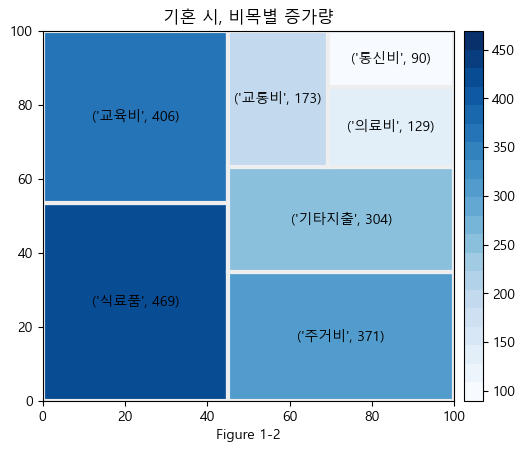

In [2]:
spend_married = [0,0,0,0,0,0,0]
spend_no_married = [0,0,0,0,0,0,0]
label = ['식료품','주거비','교육비','의료비','교통비','통신비','기타지출']
total_married = 0
total_no_married = 0
for i in range(1, len(spend)):
    if spend['비목별'][i] == '식료품':
        if spend['가구특성별'][i] == '(가구주 혼인상태) 배우자 있음':
            spend_married[0] += int(spend['2022'][i])
        elif spend['가구특성별'][i] == '(가구주 혼인상태) 미혼':
            spend_no_married[0]+=int(spend['2022'][i])
            
    elif spend['비목별'][i] == '주거비':
        if spend['가구특성별'][i] == '(가구주 혼인상태) 배우자 있음':
            spend_married[1] += int(spend['2022'][i])
        elif spend['가구특성별'][i] == '(가구주 혼인상태) 배우자 있음':
            spend_no_married[1]+=int(spend['2022'][i])
            
    elif spend['비목별'][i] == '교육비':
        if spend['가구특성별'][i] == '(가구주 혼인상태) 배우자 있음':
            spend_married[2] += int(spend['2022'][i])
        elif spend['가구특성별'][i] == '(가구주 혼인상태) 미혼':
            spend_no_married[2]+=int(spend['2022'][i])
            
    elif spend['비목별'][i] == '의료비':
        if spend['가구특성별'][i] == '(가구주 혼인상태) 배우자 있음':
            spend_married[3] += int(spend['2022'][i])
        elif spend['가구특성별'][i] == '(가구주 혼인상태) 미혼':
            spend_no_married[3]+=int(spend['2022'][i])
            
    elif spend['비목별'][i] == '교통비':
        if spend['가구특성별'][i] == '(가구주 혼인상태) 미혼':
            spend_married[4] += int(spend['2022'][i])
        elif spend['가구특성별'][i] == '(가구주 혼인상태) 미혼':
            spend_no_married[4]+=int(spend['2022'][i])
            
    elif spend['비목별'][i] == '통신비':
        if spend['가구특성별'][i] == '(가구주 혼인상태) 배우자 있음':
            spend_married[5] += int(spend['2022'][i])
        elif spend['가구특성별'][i] == '(가구주 혼인상태) 미혼':
            spend_no_married[5]+=int(spend['2022'][i])
            
    elif spend['비목별'][i] == '기타지출':
        if spend['가구특성별'][i] == '(가구주 혼인상태) 배우자 있음':
            spend_married[6] += int(spend['2022'][i])
        elif spend['가구특성별'][i] == '(가구주 혼인상태) 미혼':
            spend_no_married[6]+=int(spend['2022'][i])
            
    elif spend['비목별'][i] == '소비지출':
        if spend['가구특성별'][i] == '(가구주 혼인상태) 배우자 있음':
            total_married += int(spend['2022'][i])
        elif spend['가구특성별'][i] == '(가구주 혼인상태) 미혼':
            total_no_married += int(spend['2022'][i])

differences = [0,0,0,0,0,0,0]

length = len(spend_married)

for i in range(0,length):
    differences[i] = spend_married[i] - spend_no_married[i]
    differences[i] = int(differences[i])


import squarify

sorted_data = sorted(zip(differences, label), reverse=True)
differences, label = zip(*sorted_data)

colors =[]
cmap = mpl.cm.get_cmap('Blues',20)
cmap
for i in range(0,len(differences)):
    colors.append(cmap(17-3*i))

fig, ax = plt.subplots()
squarify.plot(differences, label=zip(label,differences), color=colors, bar_kwargs=dict(linewidth=3, edgecolor="#eee"))
ax.set_title('기혼 시, 비목별 증가량')
ax.set_xlabel('Figure 1-2')

norm = mpl.colors.Normalize(vmin=min(differences), vmax=max(differences))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)

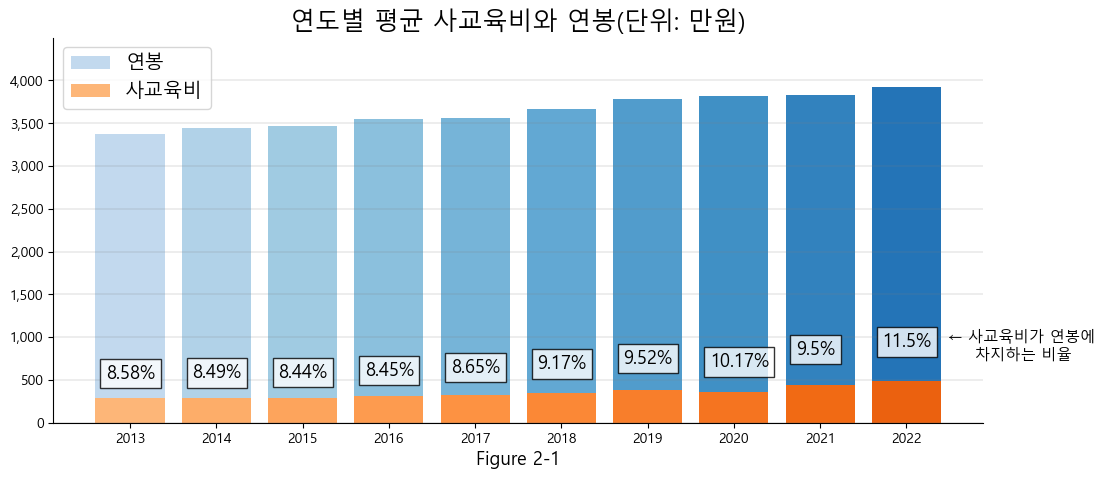

In [3]:
fig,ax3 = plt.subplots(figsize=(12,5))

colors1 = []
colors2 = []
cmap1 = mpl.cm.get_cmap('Blues',20)
cmap2 = mpl.cm.get_cmap('Oranges',30)
for i in range(0,11):
    colors1.append(cmap1(i+5))
    colors2.append(cmap2(i+10))

ax3.ticklabel_format(style = 'plain', axis = 'y')
ax3.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax3.bar(x3[1:],y3[1:], color = colors1)
bars = ax3.bar(x2[1:],y2[1:], color= colors2)

ax3.set_title('연도별 평균 사교육비와 연봉(단위: 만원)', size=18)
ax3.set_yticks(range(0,4500,500))
ax3.legend(labels=['연봉', '사교육비'], loc = 'upper left', fontsize = 14)
ax3.set_ylim(0,4500)
ax3.grid(color = 'gray', linewidth = 0.2, axis = 'y')

education_fee_percentage_by_salary = []
for i in range(len(x3)):
    education_fee_percentage_by_salary.append(round(y2[i]/y3[i]*100, 2))

for i in range(0,10):
    m = ax3.patches[i]
    ax3.text(x = m.get_x() + 0.15*m.get_width(), y = bars[i].get_height()*1.8, 
             s = '{}{}'.format(education_fee_percentage_by_salary[i],'%'), bbox = dict(facecolor = 'white', alpha =.8),fontsize=13)
ax3.text(bars[9].get_x()+1.1*bars[9].get_width(), bars[9].get_height()*1.5, '← 사교육비가 연봉에\n     차지하는 비율', fontsize =11)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_xlabel('Figure 2-1',size = 13)

plt.show()

Text(0.5, 0, 'Figure 2-2')

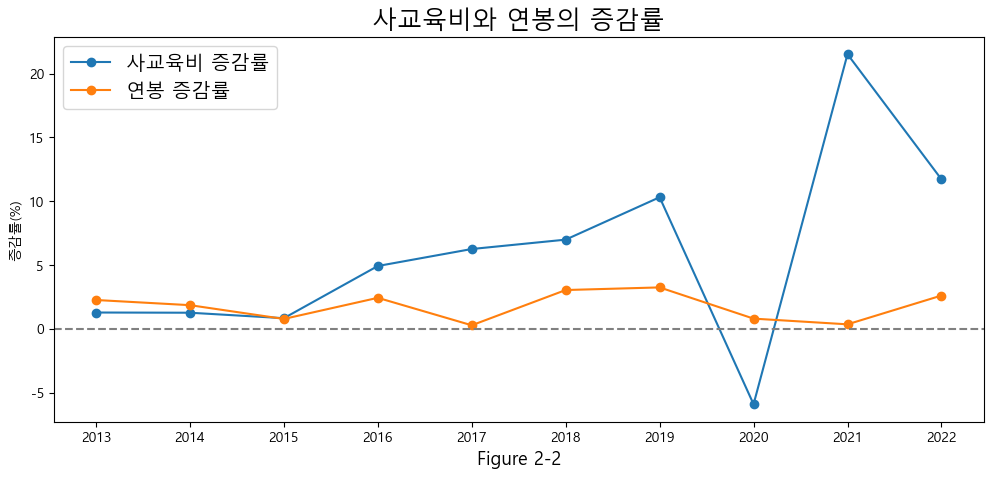

In [4]:
fig, ax2 = plt.subplots(figsize = (12,5))

ax2.plot(x2[1:],education_percentage_change, 'o-')
ax2.plot(x3[1:], salary_percentage_change, 'o-')
ax2.legend(['사교육비 증감률', '연봉 증감률'], loc = 'upper left', fontsize = 14)
ax2.set_title('사교육비와 연봉의 증감률', size=18)
ax2.set_ylabel('증감률(%)')
ax2.axhline(y=0, color='gray', linestyle='--')
ax2.set_xlabel('Figure 2-2', size=13)